In [3]:
library(dplyr)
library(ggplot2)
library(grid)
library(gridExtra)
library(reshape2)

In [4]:
houses = tbl_df(read.csv("../data/train.csv", stringsAsFactors = FALSE))
houses = houses %>% filter(!is.na(YrSold))

In [67]:
head(houses)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,ellip.h,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [68]:
summary(houses)

       Id           MSSubClass      MSZoning          LotFrontage    
 Min.   :   1.0   Min.   : 20.0   Length:1460        Min.   : 21.00  
 1st Qu.: 365.8   1st Qu.: 20.0   Class :character   1st Qu.: 59.00  
 Median : 730.5   Median : 50.0   Mode  :character   Median : 69.00  
 Mean   : 730.5   Mean   : 56.9                      Mean   : 70.05  
 3rd Qu.:1095.2   3rd Qu.: 70.0                      3rd Qu.: 80.00  
 Max.   :1460.0   Max.   :190.0                      Max.   :313.00  
                                                     NA's   :259     
    LotArea          Street             Alley             LotShape        
 Min.   :  1300   Length:1460        Length:1460        Length:1460       
 1st Qu.:  7554   Class :character   Class :character   Class :character  
 Median :  9478   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 10517                                                           
 3rd Qu.: 11602                                                  

In [46]:
get_covariate_hist <- function(col_name){
    col_df = houses %>% select_(col_name) %>% na.omit()
    col = col_df %>% .[[col_name]]
    q25 = quantile(col, 0.25)[[1]]
    q75 = quantile(col, 0.75)[[1]]
    n = length(col)
    bin_width = 2 * (q75 - q25) * (n ** (- 1/3))
    g =  ggplot(col_df, aes_string(col_name))+ geom_histogram(binwidth=bin_width)
    return(g)
}

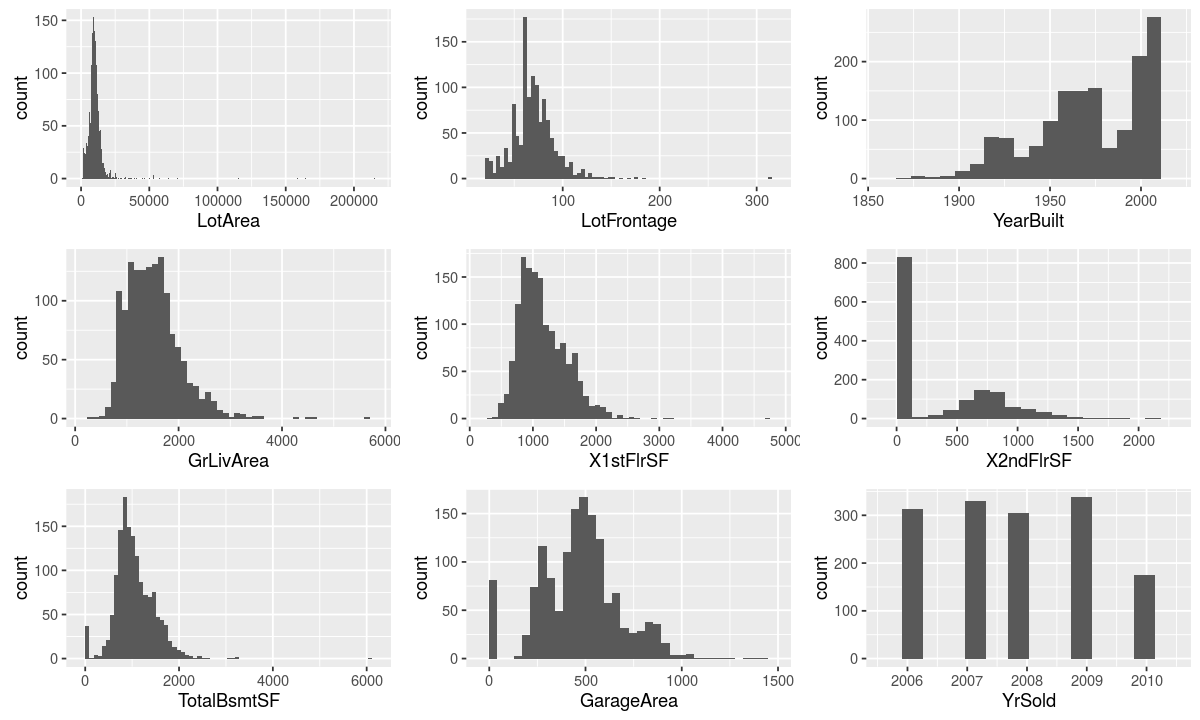

In [107]:
options(repr.plot.width = 10, repr.plot.height = 6)

gLotArea = get_covariate_hist("LotArea")
gLotFrontage = get_covariate_hist("LotFrontage")
gYearBuilt = get_covariate_hist("YearBuilt")
gX1stFlrSF = get_covariate_hist("X1stFlrSF")
gX2ndFlrSF = get_covariate_hist("X2ndFlrSF")
gGrLivArea = get_covariate_hist("GrLivArea")
gTotalBsmtSF = get_covariate_hist("TotalBsmtSF")
gGarageArea = get_covariate_hist("GarageArea")
gYrSold = get_covariate_hist("YrSold")

grid.arrange(
    gLotArea, gLotFrontage, gYearBuilt,
    gGrLivArea, gX1stFlrSF, gX2ndFlrSF,
    gTotalBsmtSF, gGarageArea, gYrSold,
    layout_matrix=rbind(
        c(1, 2, 3),
        c(4, 5, 6),
        c(7, 8, 9)
    )
)

In [126]:
houses_year_price = houses %>% select(YrSold, SalePrice) %>% group_by(YrSold)
houses_year_price_trimmed = houses_year_price %>% filter(SalePrice < quantile(SalePrice, 0.95))

df = houses_year_price %>%
        summarise(
            meanPrice=mean(SalePrice),
            q02=quantile(SalePrice, 0.02),
            q10=quantile(SalePrice, 0.1),
            q25=quantile(SalePrice, 0.25),
            medianPrice=median(SalePrice),
            q75=quantile(SalePrice, 0.75),
            q90=quantile(SalePrice, 0.9),
            q95=quantile(SalePrice, 0.95),
            q99=quantile(SalePrice, 0.99)
        )
df = melt(df, id.vars=c("YrSold"), variable.name=c('Statistic'))

df_trimmed = houses_year_price_trimmed %>%
        summarise(
            meanPrice=mean(SalePrice),
            q02=quantile(SalePrice, 0.02),
            q10=quantile(SalePrice, 0.1),
            q25=quantile(SalePrice, 0.25),
            medianPrice=median(SalePrice),
            q75=quantile(SalePrice, 0.75),
            q90=quantile(SalePrice, 0.9),
            q95=quantile(SalePrice, 0.95),
            q99=quantile(SalePrice, 0.99)
        )
df_trimmed = melt(df_trimmed, id.vars=c("YrSold"), variable.name=c('Statistic'))

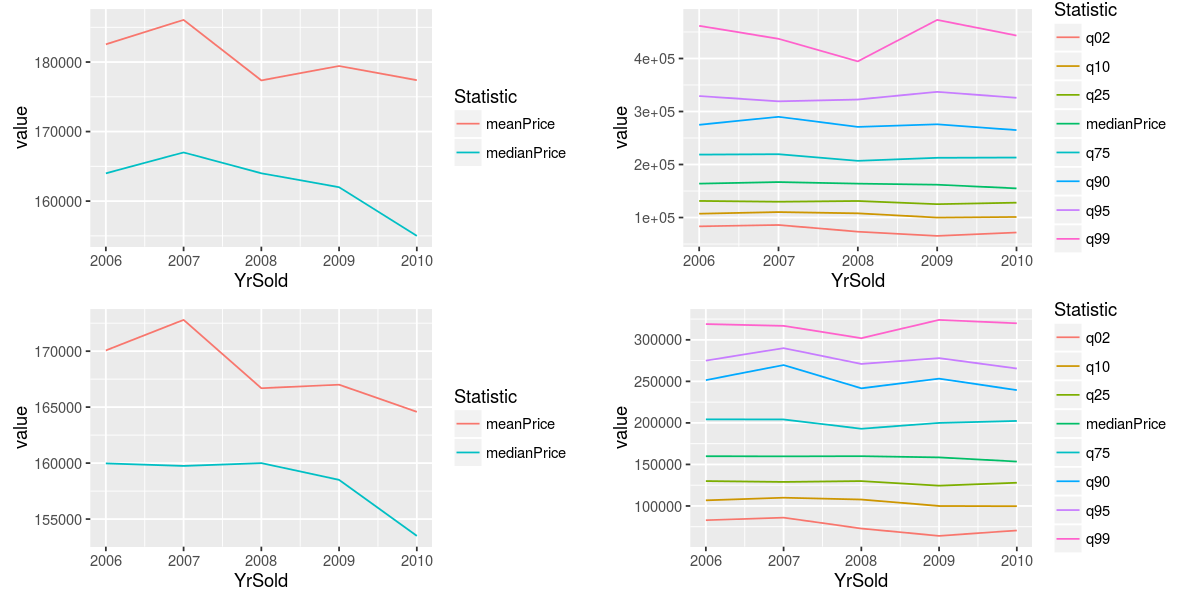

In [127]:
options(repr.plot.width = 10, repr.plot.height = 5)

g1 = ggplot(df %>% filter(Statistic %in% c("meanPrice", "medianPrice")), aes(YrSold, value, group=Statistic))
g1 = g1 + geom_line(aes(colour = Statistic))

g2 = ggplot(df %>% filter(Statistic %in% c("q02", "q10", "q25", "medianPrice", "q75", "q90", "q95", "q99")), aes(YrSold, value, group=Statistic))
g2 = g2 + geom_line(aes(colour = Statistic))

g3 = ggplot(df_trimmed %>% filter(Statistic %in% c("meanPrice", "medianPrice")), aes(YrSold, value, group=Statistic))
g3 = g3 + geom_line(aes(colour = Statistic))

g4 = ggplot(df_trimmed %>% filter(Statistic %in% c("q02", "q10", "q25", "medianPrice", "q75", "q90", "q95", "q99")), aes(YrSold, value, group=Statistic))
g4 = g4 + geom_line(aes(colour = Statistic))

grid.arrange(g1, g2, g3, g4, layout_matrix=rbind(c(1, 2), c(3, 4)))

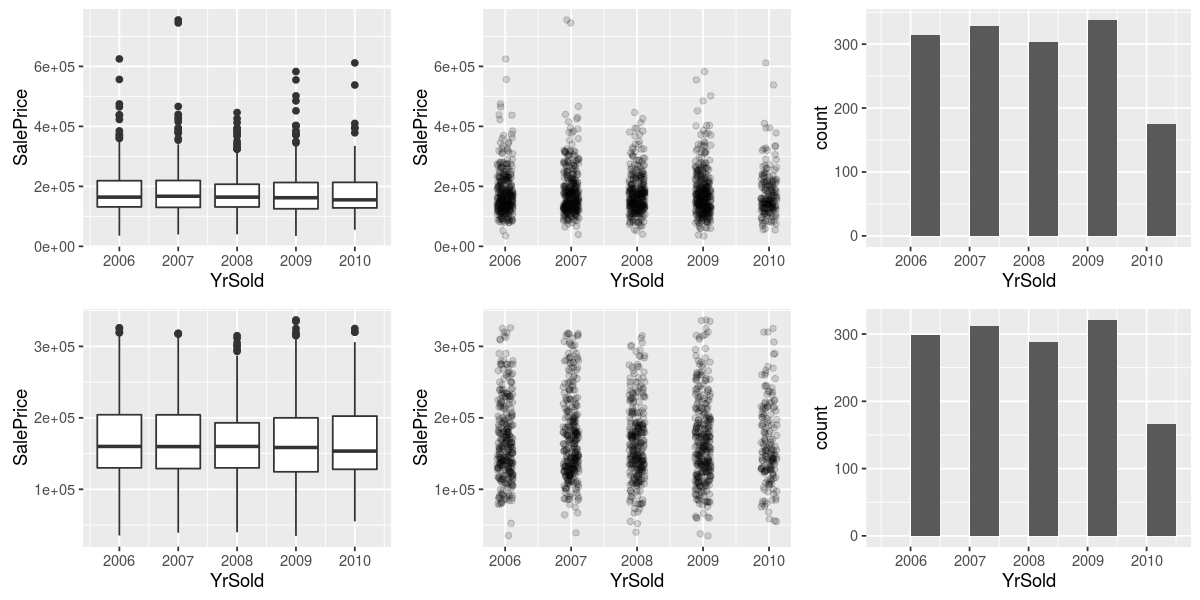

In [135]:
options(repr.plot.width = 10, repr.plot.height = 5)

houses_price_trimmed = houses %>% group_by(YrSold) %>% filter(SalePrice < quantile(SalePrice, 0.95))

g1 = ggplot(houses, aes(YrSold, SalePrice))
g1 = g1 + geom_boxplot(aes(group=YrSold))

g2 = ggplot(houses, aes(YrSold, SalePrice))
g2 = g2 + geom_point(position=position_jitter(0.3), alpha=0.15)

g3 = ggplot(houses, aes(YrSold)) + geom_histogram(binwidth=0.5)

g4 = ggplot(houses_price_trimmed, aes(YrSold, SalePrice))
g4 = g4 + geom_boxplot(aes(group=YrSold))

g5 = ggplot(houses_price_trimmed, aes(YrSold, SalePrice))
g5 = g5 + geom_point(position=position_jitter(0.3), alpha=0.15)

g6 = ggplot(houses_price_trimmed, aes(YrSold)) + geom_histogram(binwidth=0.5)

grid.arrange(g1, g2, g3, g4, g5, g6, layout_matrix=rbind(c(1, 2, 3), c(4, 5, 6)))

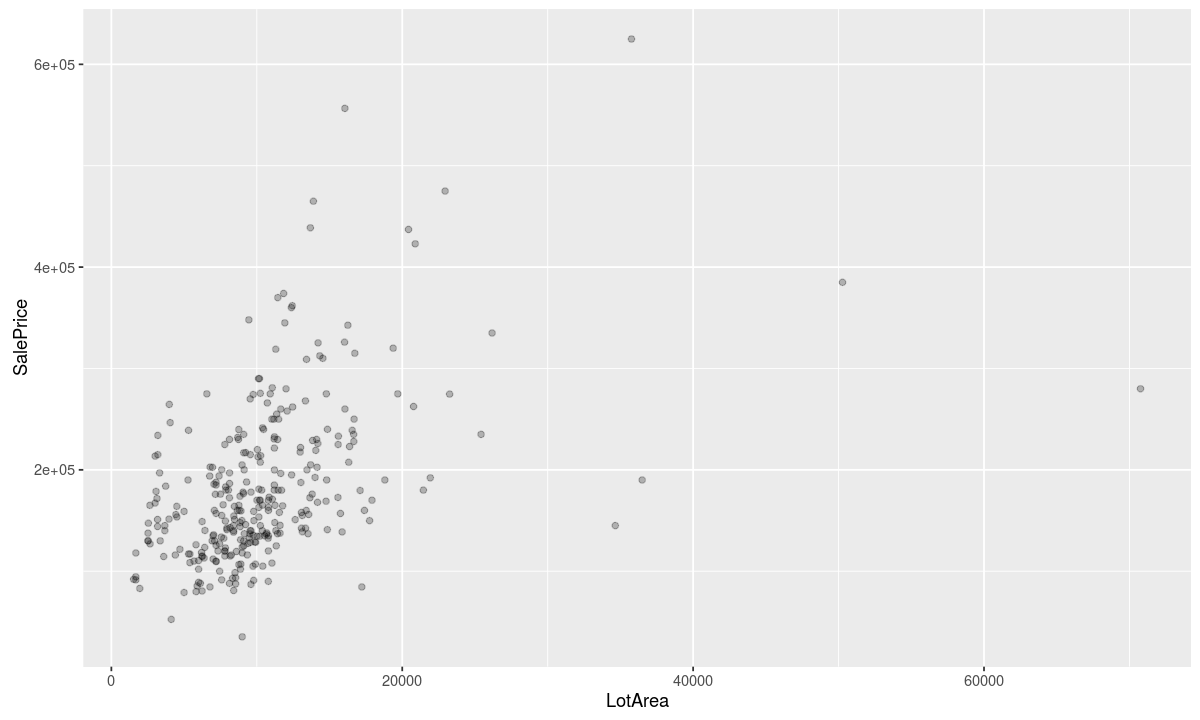

In [49]:
houses2006 = houses %>% filter(YrSold == 2006)
g = ggplot(houses2006, aes(LotArea, SalePrice))
g = g + geom_point(alpha=0.25)
g

In [50]:
houses_normal_size = houses %>% filter(LotArea <= 25000)
houses_extra_size = houses %>% filter(LotArea > 25000)
dim(houses_normal_size)
dim(houses_extra_size)

[1] 1429   81

[1] 31 81

In [51]:
summary(houses_normal_size$LotArea)
sd(houses_normal_size$LotArea)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1300    7500    9375    9551   11400   25000 

[1] 3658.759

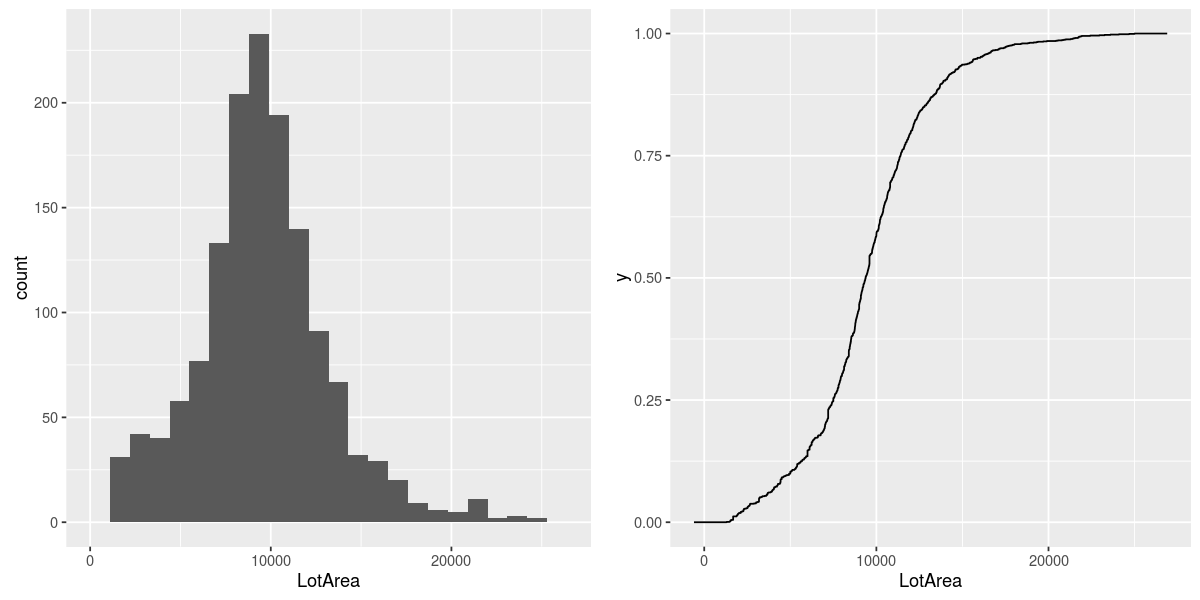

In [52]:
options(repr.plot.width = 10, repr.plot.height = 5)
g1 = ggplot(houses_normal_size, aes(LotArea)) 
g1 = g1 + geom_histogram(binwidth=1100)

g2 = ggplot(houses_normal_size, aes(LotArea)) 
g2 = g2 + stat_ecdf(geom = "step")

grid.arrange(g1, g2, layout_matrix=rbind(c(1, 2)))

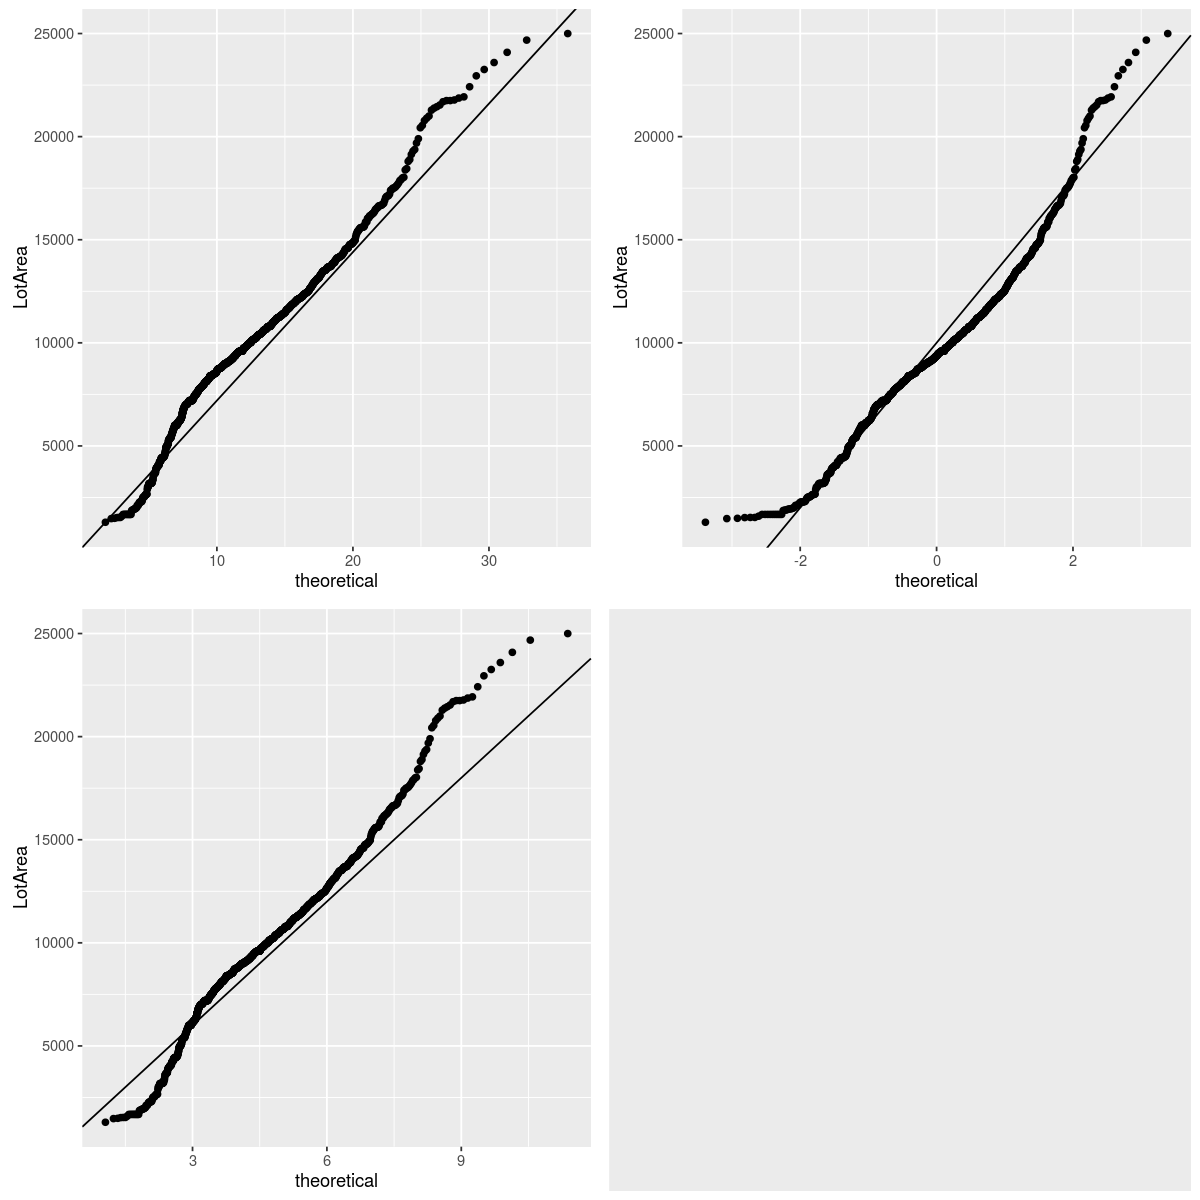

In [53]:
options(repr.plot.width = 10, repr.plot.height = 10)
g1 = ggplot(houses_normal_size, aes(sample=LotArea))
g1 = g1 + stat_qq(distribution=qchisq, dparams = list(df=12, ncp=0))
g1 = g1 + geom_abline(intercept=0, slope=720)
g1 = g1 + ylab("LotArea")

g2 = ggplot(houses_normal_size, aes(sample=LotArea))
g2 = g2 + stat_qq(distribution=qnorm)
g2 = g2 + geom_abline(intercept=10000, slope=4000)
g2 = g2 + ylab("LotArea")

g3 = ggplot(houses_normal_size, aes(sample=LotArea))
g3 = g3 + stat_qq(distribution=qgamma, dparams = list(shape=9, rate=2))
g3 = g3 + geom_abline(intercept=0, slope=2000)
g3 = g3 + ylab("LotArea")

g4 = ggplot(houses_normal_size)

grid.arrange(g1, g2, g3, g4, layout_matrix=rbind(c(1, 2), c(3, 4)))